# Diabetes Prediction Using Health Indicators


---

### A Comprehensive Dataset of 100,000 Patient Records for Diabetes Risk Analysis

#### Overview
This dataset contains 100,000 patient records designed for diabetes risk prediction, analysis, and machine learning applications. The dataset is clean, preprocessed, and ready for use in classification, regression, feature engineering, statistical analysis, and data visualization.

#### Link: https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data

### Author: Rakesh Kolipaka & Ranjith Kumar Digutla

#### License
#### CC0: Public Domain

# Abstract

This project investigates the potential for predicting diabetes risk based on clinical and lifestyle health indicators. Two machine learning models - `Logistic Regression` and `Support Vector Classifier` - were applied using `Pipelines` that include preprocessing with numerical feature scaling. 

The dataset was split into training and testing subsets with stratification, and the models were evaluated using `accuracy`, `precision`, `recall`, `F1-score`, `ROC curve`, and `AUC`. Hyperparameter tuning was performed through `GridSearchCV` to optimize model performance. 

The results demonstrate excellent discriminative capability and high predictive accuracy, highlighting the potential of machine learning for early identification of diabetes risk. The project presents a complete workflow - from data preprocessing and model development to evaluation and interpretation of results.

# Overview

---

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import kagglehub

# Imports from python_functions dir
from python_functions.load_data import load_csv
from python_functions.feature_distribution import feature_distribution
from python_functions.statistic import describe, corr_matrix

In [110]:
data = load_csv('../data/source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [111]:
data['diet_score']

0        5.7
1        6.7
2        6.4
3        3.4
4        7.2
        ... 
99995    8.3
99996    8.8
99997    9.9
99998    5.9
99999    2.7
Name: diet_score, Length: 100000, dtype: float64

### Features meaning
In this section, we will explore the features and their significance. 

Since we aim to build a machine learning model that can make accurate predictions, it is crucial to thoroughly understand the data and the role of each variable.

---

**1. Diet score** - a numerical measure of overall diet quality. It is used in medicine and nutrition research to assess how closely an individual’s eating habits align with established guidelines for healthy nutrition. Higher values indicate healthier dietary patterns.

**2. BMI [Body mass index]** - a measure that relates a person's weight to their height to assess whether they are underweight, normal weight, overweight, or obese.
$$ BMI = \frac{weight\ (kg)}{(height\ (m))^2} $$

**3. Waist to Hip ratio** - A ratio between waist circumference and hip circumference.

**4. Systolic Blood pressure** - the pressure in the arteries when the heart contracts and pumps blood out. Higher values indicate increased cardiovascular strain. (140)

**5. Diastolic Blood pressure** - the pressure in the arteries when the heart relaxes between beats. Lower than systolic, it reflects the baseline pressure in the circulatory system. (90)

**6. Heart rate** - the number of heartbeats per minute. A normal resting heart rate for adults typically ranges from 60 to 100 bpm, while well-trained athletes may have values between 40 and 60 bpm. Higher resting values can indicate increased cardiovascular stress.

**7. Cholesterol total** - the total amount of cholesterol in the blood, including LDL, HDL, and triglyceride-related components. It is used to assess cardiovascular risk, with higher values indicating an increased likelihood of heart and vascular diseases.

**8. HDL Cholesterol** -  ("good" cholesterol) a lipoprotein that collects excess cholesterol from the bloodstream and transports it back to the liver for processing. Higher HDL levels help protect against plaque buildup in the arteries and reduce the risk of cardiovascular disease.

**Reference ranges in mg/dL:**

- < 40 mg/dL – low (higher risk)
- 40–59 mg/dL – acceptable
- ≥ 60 mg/dL – high (protective)

**9. LDL Cholesterol** - Low-Density Lipoprotein, is a lipoprotein that carries cholesterol from the liver to the tissues. When its levels are high, it can accumulate on the walls of blood vessels and form atherosclerotic plaques, increasing the risk of heart attack and stroke.

**Reference ranges in mg/dL:**

- < 100 mg/dL – optimal
- 100–129 mg/dL – near optimal
- 130–159 mg/dL – borderline high
- 160–189 mg/dL – high
- ≥ 190 mg/dL – very high

**10. Triglycerides** - type of fat (lipid) that the body uses for energy. When their levels are high, they can contribute to the buildup of fatty deposits inside blood vessels, accelerate atherosclerosis, and increase the risk of cardiovascular disease, especially when combined with high LDL or low HDL levels.

**Reference ranges in mg/dL:**

- < 150 mg/dL – normal
- 150–199 mg/dL – borderline high
- 200–499 mg/dL – high
- ≥ 500 mg/dL – very high


**11. Glucose fasting** - measures the amount of glucose in the blood after at least 8 hours without eating. Elevated levels may indicate insulin resistance, prediabetes, or type 2 diabetes, and they are an important risk factor in cardiovascular disease.

**Reference ranges in mg/dL:**

- < 100 mg/dL – normal
- 100–125 mg/dL – prediabetes (impaired fasting glucose)
- ≥ 126 mg/dL – diabetes (possible diagnosis)

**12. Glucose postprandial** - measures the blood glucose level 2 hours after eating. Elevated values indicate impaired glucose tolerance, insulin resistance, or diabetes, and are an important risk factor for cardiovascular disease.

**Reference ranges in mg/dL (2 hours after a meal):**

- < 140 mg/dL – normal
- 140–199 mg/dL – prediabetes (impaired glucose tolerance)
- ≥ 200 mg/dL – diabetes (possible diagnosis)


**13. Insulin level** / **Insulin** is a hormone produced by the pancreas that allows cells to absorb glucose from the bloodstream. Elevated insulin levels may indicate insulin resistance, a condition that increases the risk of prediabetes, type 2 diabetes, and cardiovascular disease.

**Reference ranges (fasting, µIU/mL):**

- 2–20 µIU/mL – normal
- 20–40 µIU/mL – elevated
- />40 µIU/mL – high
(µIU/mL = micro–International Units per milliliter)

It expresses how much biologically active hormone (such as insulin) is present in 1 milliliter of blood. 

The value is measured in activity units (IU) rather than weight, because hormones act in very small but powerful amounts.


**14. HBA1C (Hemoglobin A1c)** - measures the percentage of hemoglobin in the blood that is coated with glucose. It reflects the **average blood glucose level over the past 2–3 months**. 

Higher HbA1c levels indicate poor long-term glucose control and are used to diagnose and monitor prediabetes and diabetes.

**Reference ranges (%):**

- **< 5.7% – normal**
- **5.7%–6.4% – prediabetes**
- **≥ 6.5% – diabetes**

**15. Diabetes risk score** - is a numerical indicator that estimates the likelihood of developing type 2 diabetes based on several factors such as age, BMI, blood pressure, glucose levels, cholesterol, and lifestyle habits. Higher values indicate an increased risk and may signal the need for medical evaluation or lifestyle adjustments.

- < 20 – low risk  
- 20–29 – moderate risk  
- 30–39 – high risk  
- ≥ 40 – very high risk

**16. Diabetes stage** -  indicates the severity or progression level of glucose metabolism impairment. 
It is usually classified based on clinical markers such as fasting glucose, postprandial glucose, 
HbA1c, insulin resistance, and presence of symptoms. Higher stages represent more advanced 
metabolic dysfunction and a higher risk of diabetes-related complications.

**Common classification:**
- Stage 0 – Normal glucose metabolism
- Stage 1 – Prediabetes (impaired fasting glucose or impaired glucose tolerance)
- Stage 2 – Early diabetes
- Stage 3 – Established diabetes with metabolic impairment
- Stage 4 – Advanced diabetes with complications





Overview of the overall data structure. How many records (observations) there are and how many features. 

1. Dataset shape check
2. Data types (object, int, float etc.) check
3. Data column names check
4. Nan values check
5. Duplicate values check


---

In [112]:
# 1
data.shape

(100000, 31)

In [113]:
# 2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [114]:
# 3
data.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [115]:
# 4.
nan_values = data.isna().sum().to_frame(name="nan_count")
nan_values

,nan_count
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


In [116]:
# 5. 
data[data.duplicated()]

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes


Examine the categorical features to understand the distribution of the data.

---

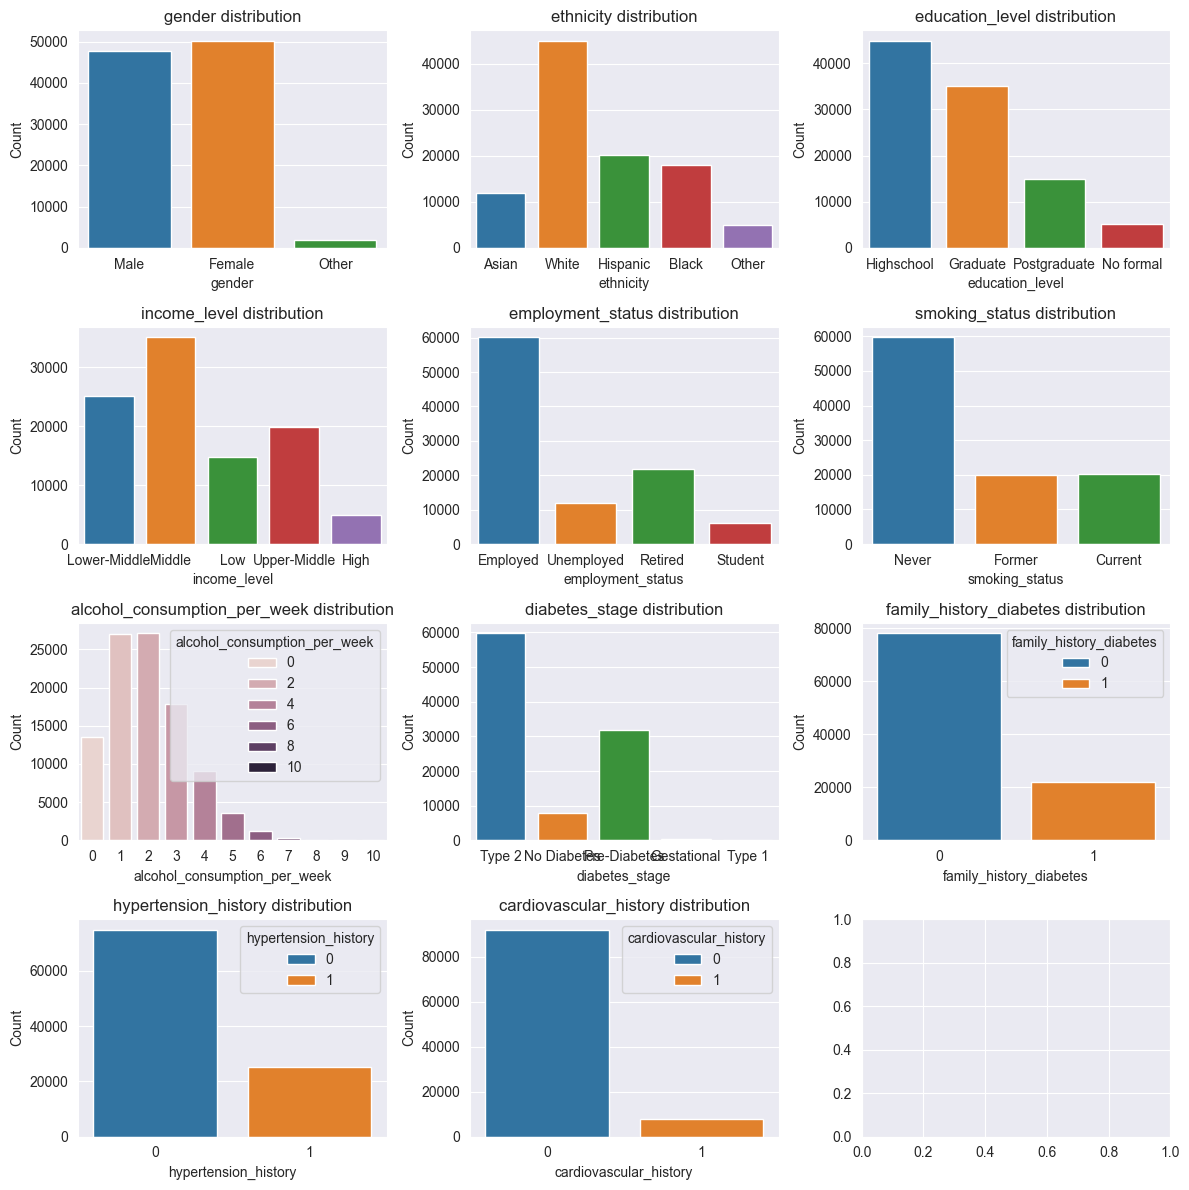

In [117]:
CATEGORICAL_FEATURES = ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 
                        'smoking_status', 'alcohol_consumption_per_week', 'diabetes_stage', 'family_history_diabetes',
                        'hypertension_history', 'cardiovascular_history']

feature_distribution(data, CATEGORICAL_FEATURES, cols=3)

Using .describe() to get a quick statistical overview of the numerical features.

This helps identify potential anomalies, outliers, data quality issues and gives

an initial understanding of how the values are distributed across the dataset.

---

In [118]:
NUMERICAL_FEATURES = data[
    [   
        'age',
        'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day',
        'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio',
        'systolic_bp', 'diastolic_bp', 'heart_rate',
        'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
        'triglycerides', 'glucose_fasting', 'glucose_postprandial',
        'insulin_level', 'hba1c', 'diabetes_risk_score'
    ]
]

In [119]:
describe(NUMERICAL_FEATURES)

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,118.911640,5.994787,6.997818,5.996468,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362
std,15.60460,84.409662,1.780954,1.094622,2.468406,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505
min,18.00000,0.000000,0.000000,3.000000,0.500000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000
25%,39.00000,57.000000,4.800000,6.300000,4.300000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000
50%,50.00000,100.000000,6.000000,7.000000,6.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000
75%,61.00000,160.000000,7.200000,7.700000,7.700000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000
max,90.00000,833.000000,10.000000,10.000000,16.800000,39.200000,1.060000,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000


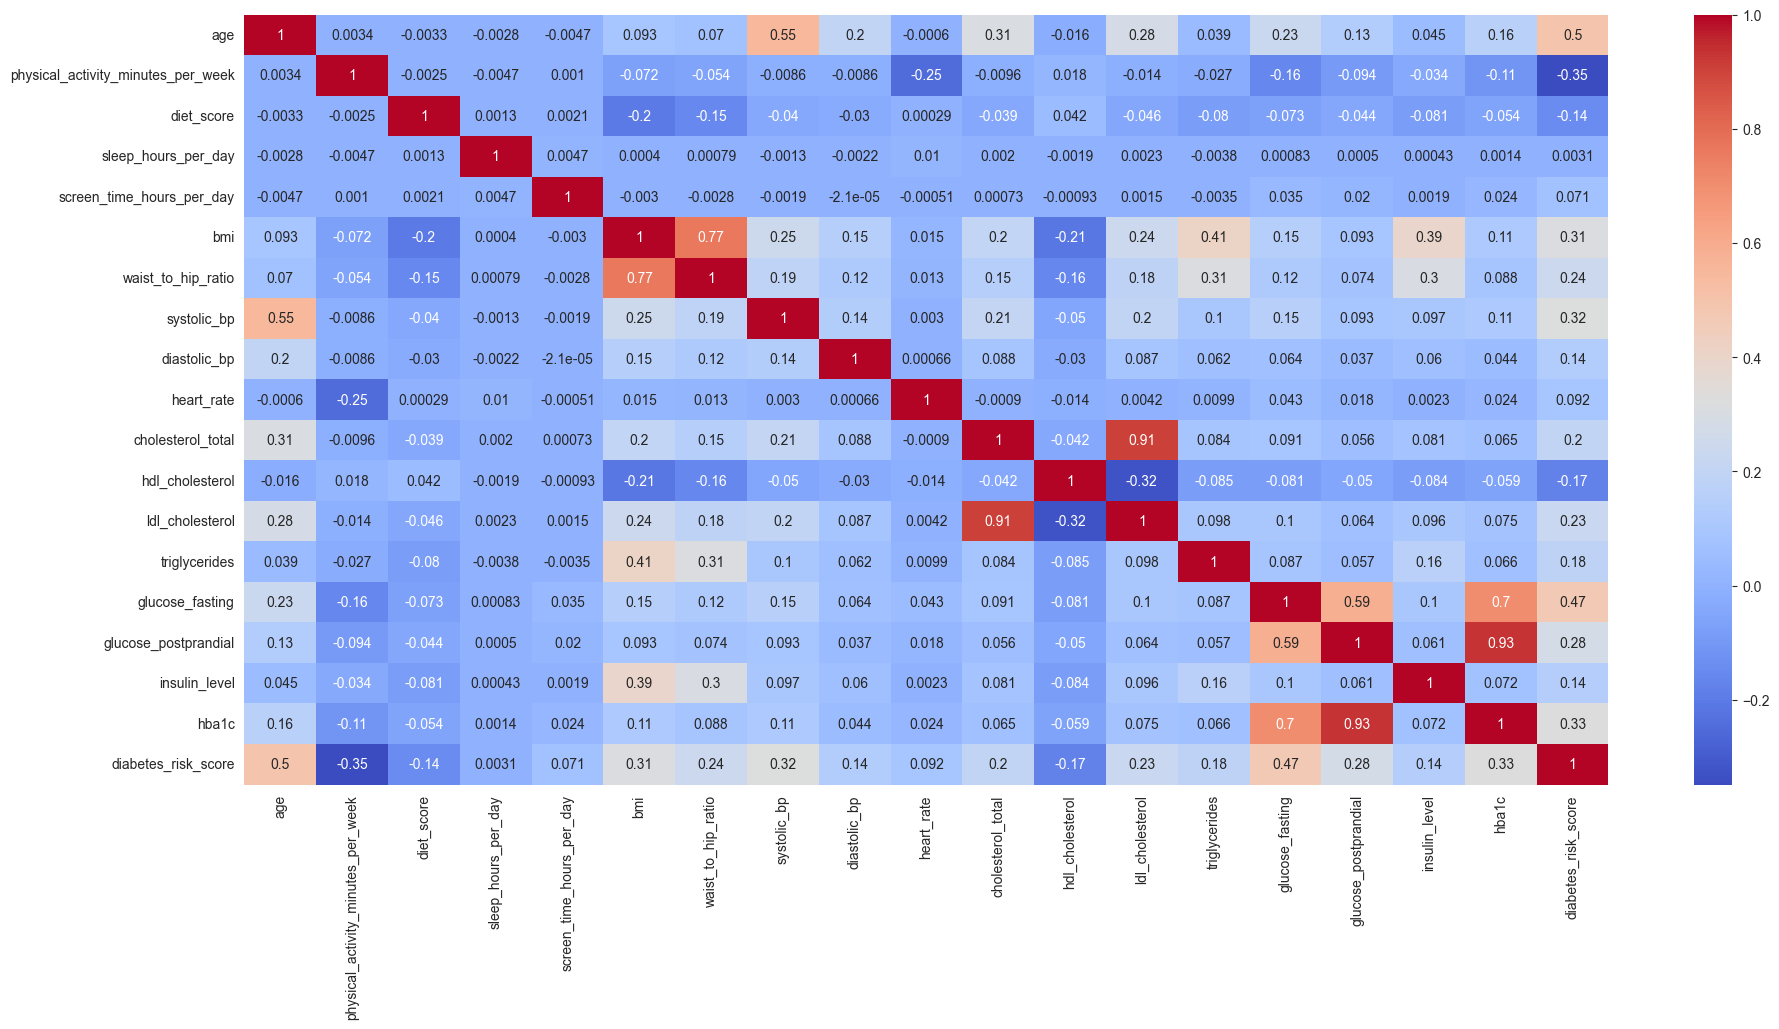

In [124]:
corr_matrix(NUMERICAL_FEATURES)

### Target distribution
- plot visualisation
- frame count - absolute and percentage count

---

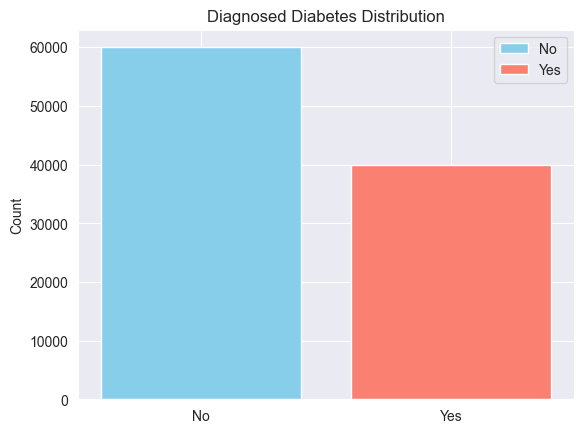

In [121]:
counts = data['diagnosed_diabetes'].value_counts()

plt.bar(['No', 'Yes'], counts, color=['skyblue', 'salmon'], label=['No', 'Yes'])
plt.ylabel("Count")
plt.legend()
plt.title('Diagnosed Diabetes Distribution')
plt.show()

In [122]:
diagnosed_false = data[data['diagnosed_diabetes'] == 0]
diagnosed_true = data[data['diagnosed_diabetes'] == 1]

target_percent_distribution = pd.DataFrame({
    'Diagnosed False': [len(diagnosed_false), round(len(diagnosed_false) / len(data)  * 100, 2)],
    'Diagnosed True': [len(diagnosed_true), round(len(diagnosed_true) / len(data)  * 100, 2)]
})
target_percent_distribution.index = ['Absolute count', 'Percent']
target_percent_distribution

,Diagnosed False,Diagnosed True
Absolute count,40002.0,59998.0
Percent,40.0,60.0


In [123]:
data_dictionary = pd.DataFrame({
    'data_type': data.dtypes,
    'abs missing': data.isna().sum(),
    '% missing': data.isna().mean() * 100,
})
data_dictionary.index.name = "features"
data_dictionary

,data_type,abs missing,% missing
features,,,
age,int64,0,0.0
gender,object,0,0.0
ethnicity,object,0,0.0
education_level,object,0,0.0
income_level,object,0,0.0
employment_status,object,0,0.0
smoking_status,object,0,0.0
alcohol_consumption_per_week,int64,0,0.0
physical_activity_minutes_per_week,int64,0,0.0
